# Modelo de predicción

In [2]:
import pandas as pd

In [ ]:
dfcrunch = pd.read_csv(r"C:\Users\elena\Desktop\databootcamp\Temario\Entrega_final\crunchbaseeda.csv")

In [4]:
dfcrunch.head(5)

,name,homepage_url,category_list,funding_total_usd,status,country_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,first_funding_year,funding_total_usd_winsorized,funding_total_usd_clean
0,#fame,http://livfame.com,Media,10000000.0,operating,IND,Mumbai,1.0,NaN,2015-01-05,2015-01-05,0,2015.0,10000000.0,10000000.0
1,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14,2014,2014.0,700000.0,700000.0
2,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,unknown,unknown,1.0,NaN,2014-01-30,2014-01-30,0,2014.0,3406878.0,3406878.0
3,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,Beijing,1.0,2007-01-01,2008-03-19,2008-03-19,2007,2008.0,2000000.0,2000000.0
4,004 Technologies,http://004gmbh.de/en/004-interact,Software,-1.0,operating,USA,Champaign,1.0,2010-01-01,2014-07-24,2014-07-24,2010,2014.0,NaN,NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Vrriable binaria éxito = 1 si sigue operando, 0 si no
dfcrunch["success"] = (dfcrunch["status"] == "operating").astype(int)

#predictores
features = ["funding_total_usd_winsorized", "funding_rounds", "country_code"]
df_model = dfcrunch[features + ["success"]].dropna()

# XY
X = df_model[features]
y = df_model["success"]

# Codificamos country_code
preprocessor = ColumnTransformer(transformers=[
    ("country", OneHotEncoder(handle_unknown="ignore"), ["country_code"])
], remainder="passthrough")

#preprocesamiento + modelo
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenamos
model.fit(X_train, y_train)

#Evaluamos
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report


{'0': {'precision': 0.26860119047619047,
  'recall': 0.16159355416293644,
  'f1-score': 0.20178870877585242,
  'support': 2234.0},
 '1': {'precision': 0.8000640478223741,
  'recall': 0.8840528426515688,
  'f1-score': 0.839964137621876,
  'support': 8478.0},
 'accuracy': 0.7333831217326363,
 'macro avg': {'precision': 0.5343326191492823,
  'recall': 0.5228231984072527,
  'f1-score': 0.5208764231988643,
  'support': 10712.0},
 'weighted avg': {'precision': 0.6892268537119022,
  'recall': 0.7333831217326363,
  'f1-score': 0.7068719131967438,
  'support': 10712.0}}

## Resultados del modelo
* Accuracy general: 73.3%
* F1-score para "éxito" (clase 1): 0.84 - Funciona bien cuando predice exito
* F1-score para "fracaso" (clase 0): 0.20 - DEbido a la falta de empresas cerradas en el dataset, no predice tambien los fracasos

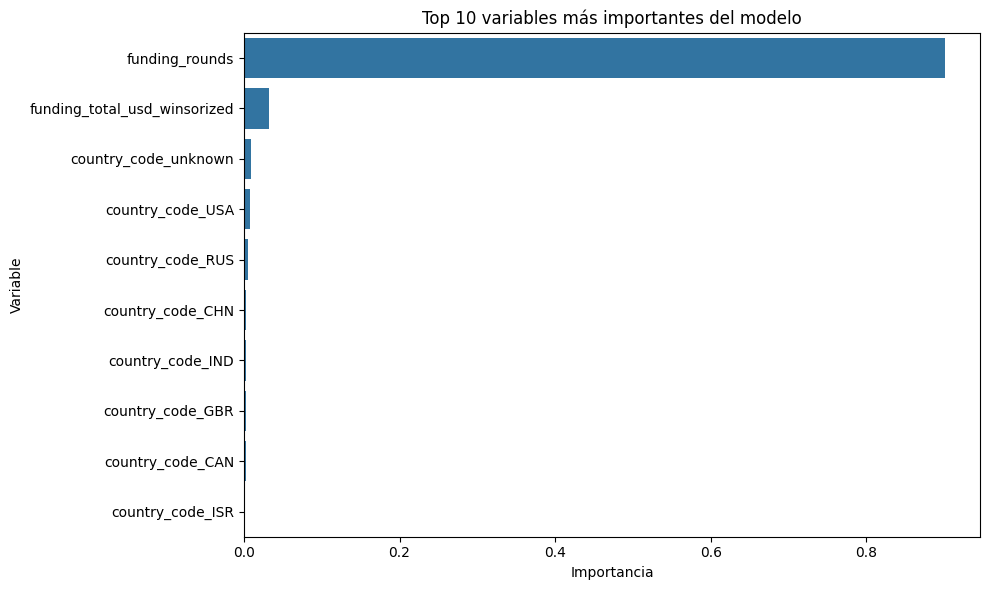

In [ ]:
#modelo entrenado
rf_model = model.named_steps["classifier"]

#Nombres de variables despues de one hot encoder
encoder = model.named_steps["preprocessor"].named_transformers_["country"]
encoded_countries = encoder.get_feature_names_out(["country_code"])
feature_names = list(encoded_countries) + ["funding_rounds", "funding_total_usd_winsorized"]

#importancias
importances = rf_model.feature_importances_

#hacemos dataframe
import pandas as pd
import numpy as np

feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)
#gráfico para ver las variables mas importantes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x="importance", y="feature")
plt.title("Top 10 variables más importantes del modelo")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
